Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


DATA EXPLORATION

Loading Train/Test Data

In [2]:
train_df= pd.read_csv(r"C:\Users\vinoo\Downloads\GUIDE_Train.csv\GUIDE_Train.csv")
train_df

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9516832,1056561956622,0,90,496631,2024-06-08T15:26:08.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516833,1228360650033,59,196410,748366,2024-06-06T09:40:08.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
9516834,867583395122,44,14117,7425,2024-06-11T22:51:03.000Z,78,57,Exfiltration,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
9516835,395136991850,43,644,8973,2024-05-20T23:01:01.000Z,52,10,Impact,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
train_df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [4]:
train_df.shape

(9516837, 45)

In [5]:
test_df= pd.read_csv(r"C:\Users\vinoo\Downloads\GUIDE_Test.csv\GUIDE_Test.csv")
test_df

C:\Users\vinoo\AppData\Local\Temp\ipykernel_334160\3579041240.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df= pd.read_csv(r"C:\Users\vinoo\Downloads\GUIDE_Test.csv\GUIDE_Test.csv")


,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147987,541165881145,262,3017,227156,2024-06-04T03:53:15.000Z,139,120,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147988,438086666953,1323,31001,304819,2024-06-04T19:32:19.000Z,219,196,InitialAccess,NaN,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private
4147989,1297080124487,47,3653,7243,2024-06-15T00:50:22.000Z,57,29,CommandAndControl,T1046;T1071;T1210,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4147990,627065226886,70,4243,19142,2024-06-11T16:18:12.000Z,1,1,InitialAccess,T1566.002,BenignPositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Private


In [6]:
test_df.isna().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [7]:
test_df.shape

(4147992, 46)

EDA

In [8]:
# Count and percentage calculation for each unique value in 'IncidentGrade'
incident_grade_summary = train_df['IncidentGrade'].value_counts(normalize=True).mul(100).to_frame(name='Percentage')
incident_grade_summary['Count'] = train_df['IncidentGrade'].value_counts()

# Reset index to have 'IncidentGrade' as a column
incident_grade_summary = incident_grade_summary.reset_index().rename(columns={'index': 'IncidentGrade'})
print(incident_grade_summary)

    IncidentGrade  Percentage    Count
0  BenignPositive   43.429489  4110817
1    TruePositive   35.103418  3322713
2   FalsePositive   21.467093  2031967


Percentage for default

IncidentGrade
BenignPositive    43.43
TruePositive      35.10
FalsePositive     21.47
Name: proportion, dtype: float64


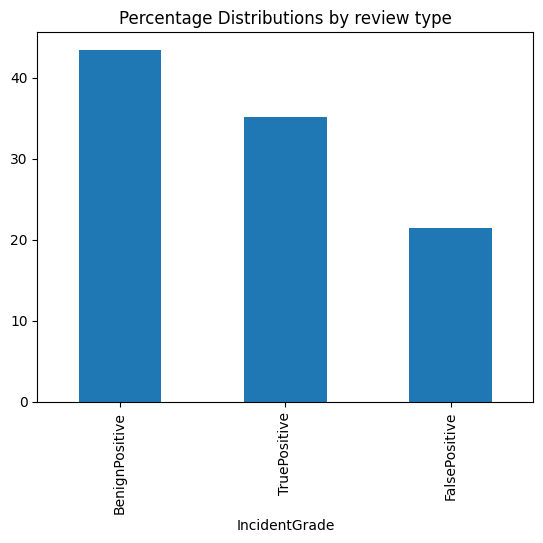

In [9]:
print('Percentage for default\n')
print(round(train_df.IncidentGrade.value_counts(normalize=True)*100,2))
round(train_df.IncidentGrade.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [10]:
# Count and percentage calculation for each unique value in 'IncidentGrade'
incident_grade_summary = test_df['IncidentGrade'].value_counts(normalize=True).mul(100).to_frame(name='Percentage')
incident_grade_summary['Count'] = test_df['IncidentGrade'].value_counts()

# Reset index to have 'IncidentGrade' as a column
incident_grade_summary = incident_grade_summary.reset_index().rename(columns={'index': 'IncidentGrade'})
print(incident_grade_summary)

    IncidentGrade  Percentage    Count
0  BenignPositive   42.259966  1752940
1    TruePositive   35.977745  1492354
2   FalsePositive   21.762289   902698


Percentage for default

IncidentGrade
BenignPositive    42.26
TruePositive      35.98
FalsePositive     21.76
Name: proportion, dtype: float64


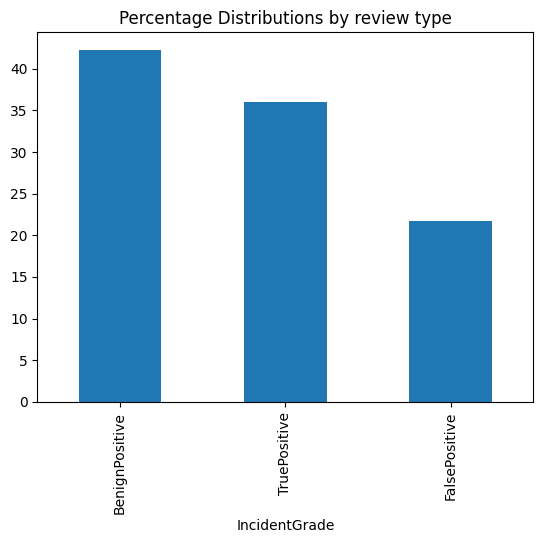

In [11]:
print('Percentage for default\n')
print(round(test_df.IncidentGrade.value_counts(normalize=True)*100,2))
round(test_df.IncidentGrade.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

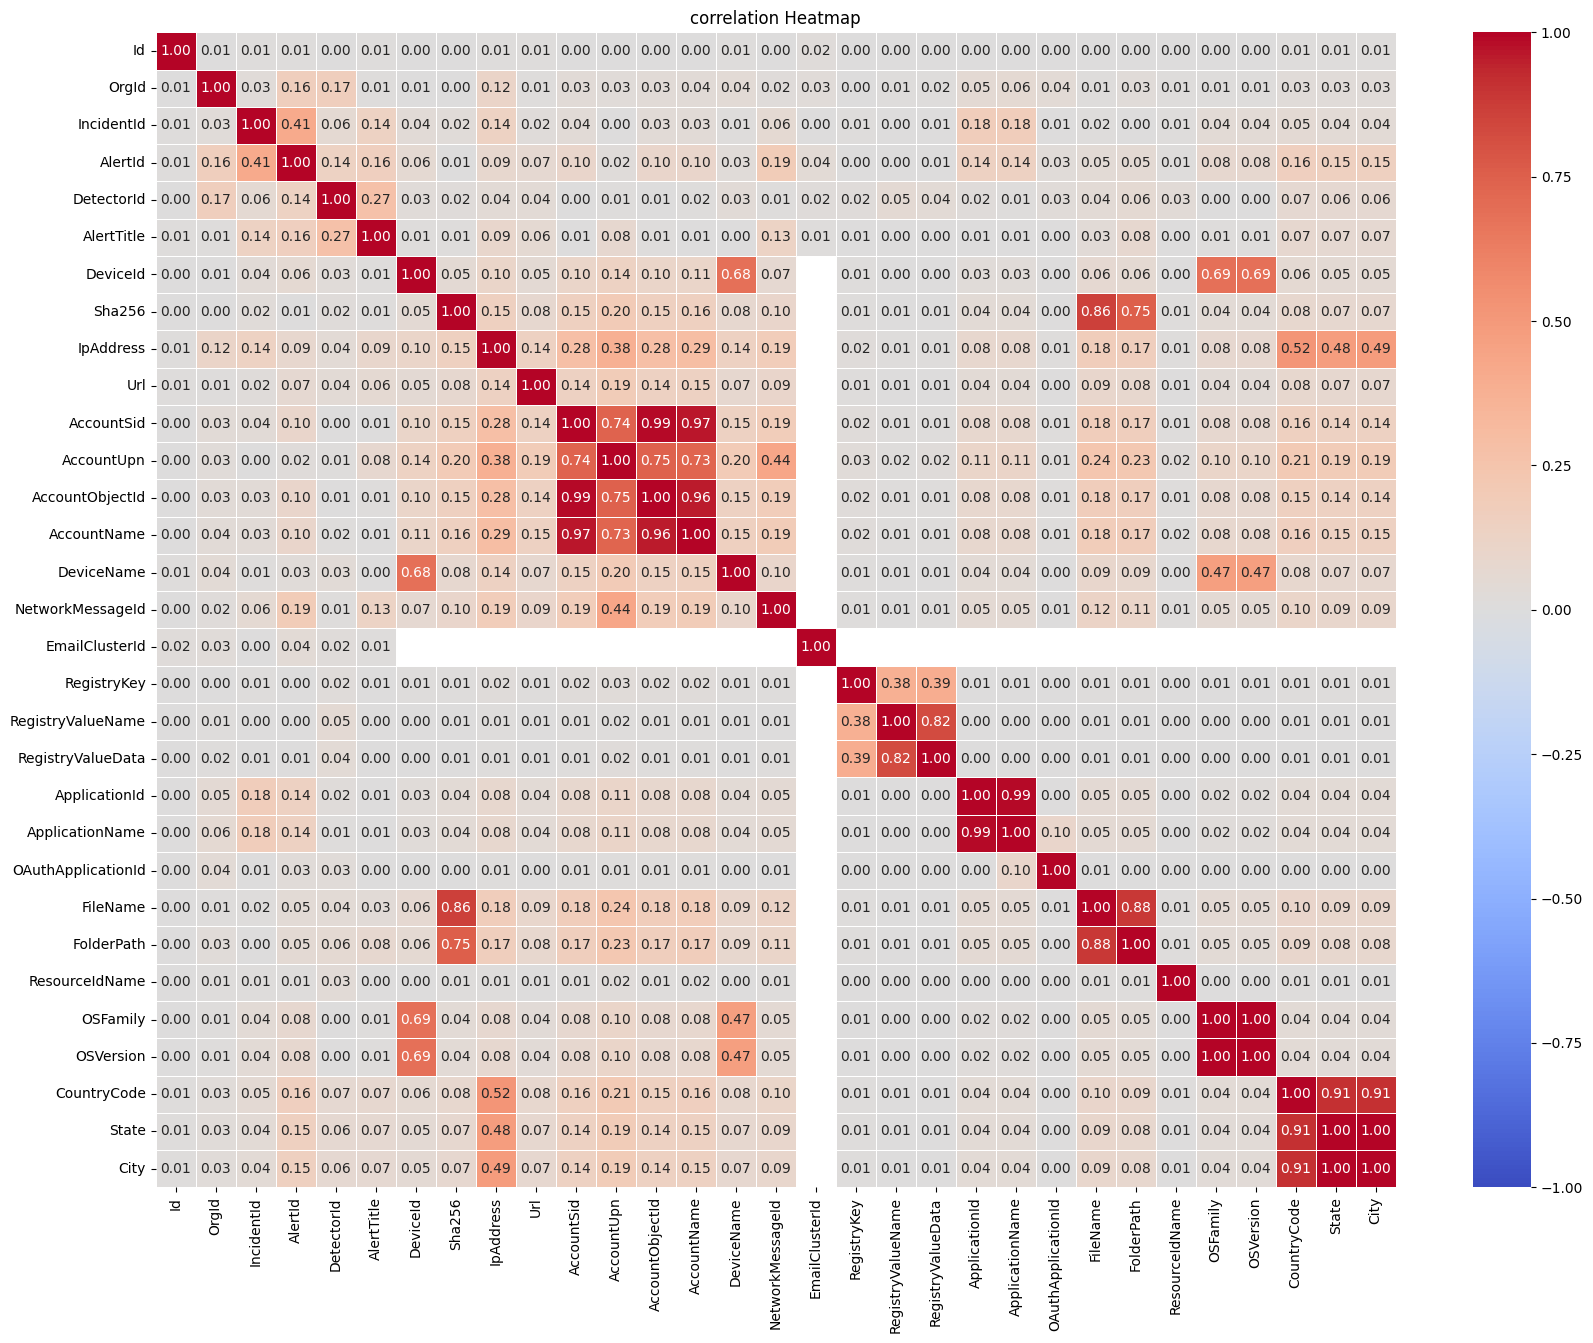

In [12]:
# selecting numerical col
numeric_df=train_df.select_dtypes(include=['number'])

corr_matrix= numeric_df.corr().abs()

# plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, linewidths=0.5)
plt.title('correlation Heatmap')
plt.show()

# Handling Missing Data & encoding

Train_df

In [13]:
train_df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [14]:
train_df= train_df.drop(['MitreTechniques', 'ActionGrouped','ActionGranular','EmailClusterId', 'ThreatFamily', 'Roles', 'ResourceType', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict' ], axis=1)

In [15]:
train_df = train_df.dropna(subset=['IncidentGrade'])

In [16]:
train_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
dtype: int64

In [17]:
# Check for any duplicate rows
duplicates = train_df[train_df.duplicated()]

# Display duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 542692


In [18]:
train_df.drop_duplicates(inplace=True)

In [19]:
train_df.shape

(8922805, 35)

Test_df

In [20]:
test_df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       2307104
IncidentGrade               0
ActionGrouped         4146079
ActionGranular        4146079
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        4106285
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          4116614
FileName                    0
FolderPath

In [21]:
test_df= test_df.drop(['MitreTechniques', 'ActionGrouped','ActionGranular','EmailClusterId', 'ThreatFamily', 'Roles', 'ResourceType', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict' ], axis=1)

In [22]:
test_df = test_df.dropna(subset=['IncidentGrade'])

In [23]:
# Check for any duplicate rows
duplicates = test_df[test_df.duplicated()]

# Display duplicate rows, if any
print(f"Number of duplicate rows: {len(duplicates)}")


Number of duplicate rows: 225297


In [24]:
test_df.drop_duplicates(inplace=True)

In [25]:
test_df.isnull().sum()

Id                    0
OrgId                 0
IncidentId            0
AlertId               0
Timestamp             0
DetectorId            0
AlertTitle            0
Category              0
IncidentGrade         0
EntityType            0
EvidenceRole          0
DeviceId              0
Sha256                0
IpAddress             0
Url                   0
AccountSid            0
AccountUpn            0
AccountObjectId       0
AccountName           0
DeviceName            0
NetworkMessageId      0
RegistryKey           0
RegistryValueName     0
RegistryValueData     0
ApplicationId         0
ApplicationName       0
OAuthApplicationId    0
FileName              0
FolderPath            0
ResourceIdName        0
OSFamily              0
OSVersion             0
CountryCode           0
State                 0
City                  0
Usage                 0
dtype: int64

In [26]:
test_df.shape

(3922695, 36)

Feature Engineering

In [27]:
# Converting Timestamp to date time

train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'])
test_df['Timestamp'] = pd.to_datetime(test_df['Timestamp'])

In [28]:
train_df["Day"] = train_df["Timestamp"].dt.day
train_df["Month"] = train_df["Timestamp"].dt.month
train_df["Year"] = train_df["Timestamp"].dt.year
train_df["Hour"] = train_df["Timestamp"].dt.hour
train_df["Time"] = train_df["Timestamp"].dt.time


test_df["Day"] = test_df["Timestamp"].dt.day
test_df["Month"] = test_df["Timestamp"].dt.month
test_df["Year"] = test_df["Timestamp"].dt.year
test_df["Hour"] = test_df["Timestamp"].dt.hour
test_df["Time"] = test_df["Timestamp"].dt.time

In [29]:
train_df.drop(columns=['Timestamp'], inplace=True)
test_df.drop(columns=['Timestamp'], inplace=True)

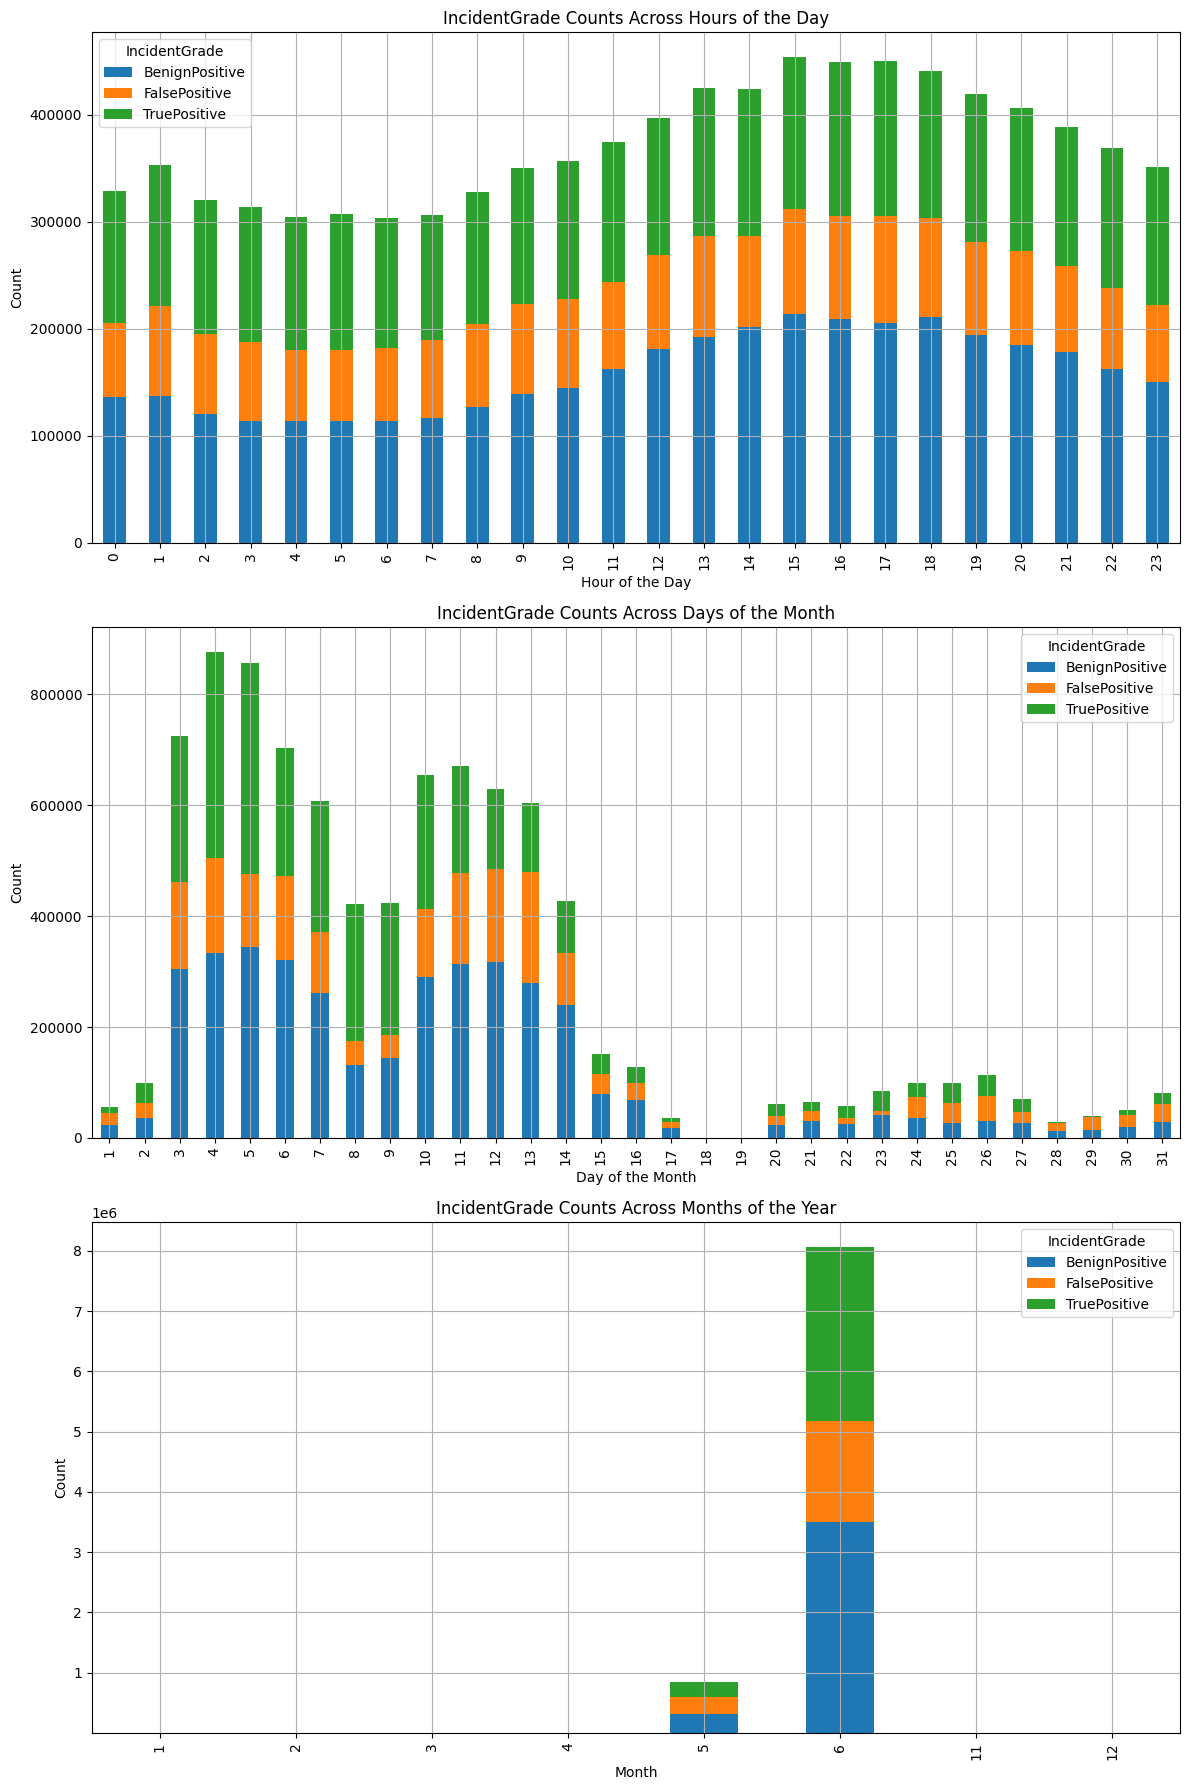

In [30]:
# Aggregate data
hour_incident_grade = train_df.groupby(['Hour', 'IncidentGrade']).size().unstack()
day_incident_grade = train_df.groupby(['Day', 'IncidentGrade']).size().unstack()
month_incident_grade = train_df.groupby(['Month', 'IncidentGrade']).size().unstack()

# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Hourly distribution (stacked bar plot)
hour_incident_grade.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title("IncidentGrade Counts Across Hours of the Day")
axes[0].set_xlabel("Hour of the Day")
axes[0].set_ylabel("Count")
axes[0].legend(title='IncidentGrade')
axes[0].grid(True)

# Daily distribution (stacked bar plot)
day_incident_grade.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title("IncidentGrade Counts Across Days of the Month")
axes[1].set_xlabel("Day of the Month")
axes[1].set_ylabel("Count")
axes[1].legend(title='IncidentGrade')
axes[1].grid(True)

# Monthly distribution (stacked bar plot)
month_incident_grade.plot(kind='bar', stacked=True, ax=axes[2])
axes[2].set_title("IncidentGrade Counts Across Months of the Year")
axes[2].set_xlabel("Month")
axes[2].set_ylabel("Count")
axes[2].legend(title='IncidentGrade')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

Encoding Categorical Variables

In [31]:
# Encoding categorical variables

categorical = train_df.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    train_df[feature] = encoder.fit_transform(train_df[feature])

train_df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OSFamily,OSVersion,CountryCode,State,City,Day,Month,Year,Hour,Time
0,180388628218,0,612,123247,7,6,10,2,15,1,...,5,66,31,6,3,4,6,2024,6,21915
1,455266534868,88,326,210035,58,43,7,1,32,0,...,5,66,242,1445,10630,14,6,2024,3,10885
2,1056561957389,809,58352,712507,423,298,10,1,31,1,...,5,66,242,1445,10630,13,6,2024,4,17575
3,1279900258736,92,32992,774301,2,2,1,0,31,1,...,5,66,242,1445,10630,10,6,2024,16,59976
4,214748368522,148,4359,188041,9,74,6,2,32,0,...,5,66,242,1445,10630,15,6,2024,1,4087


In [32]:
# Encoding categorical variables of testdata

categorical = test_df.select_dtypes(include=['object']).columns

for feature in categorical:
    encoder = LabelEncoder()
    test_df[feature] = encoder.fit_transform(test_df[feature])

test_df.head()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,OSVersion,CountryCode,State,City,Usage,Day,Month,Year,Hour,Time
0,1245540519230,657,11767,87199,524,563,11,0,28,0,...,66,242,1445,10630,0,4,6,2024,22,82520
1,1400159342154,3,91158,632273,2,2,1,0,15,0,...,0,242,1445,10630,1,3,6,2024,12,46649
2,1279900255923,145,32247,131719,2932,10807,11,0,23,1,...,66,242,1445,10630,1,8,6,2024,3,12037
3,60129547292,222,15294,917686,0,0,10,1,7,1,...,66,242,1445,10630,1,12,6,2024,12,43594
4,515396080539,363,7615,5944,27,18,5,0,28,0,...,66,242,1445,10630,1,6,6,2024,17,63665


In [33]:
train_df.to_csv('traindf_processed.csv', index=False)

In [ ]:
test_df.to_csv('testdf_processed.csv', index=False)

: 